Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de cliente desarrollando productos personalizados en pos de las preferencias y necesidades de cada uno de sus clientes.

El set de datos potencial contiene datos sobre clientes de una institución financiera:

Customer ID: ID asociado al cliente.

Age: Edad en años del cliente.

Income: Ingreso anual del cliente.

Family: Tamaño del grupo familiar del cliente.

CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito.

Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera).

Mortgage: Monto de la hipoteca (0 indica que no posee)

ZIP Code: Código postal del domicilio.

En la última campaña a cada cliente se le ofreció un producto personalizado en base a su comportamiento financiero, preferencias, capacidad de pago y necesidades. La variable target corresponde a Personal Loan la cuál indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.

Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a los clientes con dichas características y priorizarlos a ellos en las próximas campañas.

1. Cargue la base de datos potencial.xlsx usando el bloque de código adjunto. Elimine las variables ID y ZIP Code, pues no es razonable obtener aprendizaje desde estas variables. Finalmente indique la cantidad de datos faltantes por variable a través de un gráfico de barras.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Opciones para evitar notación científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: f"{x:0.5f}")

# Configuración de los gráficos
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"


In [3]:
df_potencial_og= pd.read_excel("potencial (1).xlsx")

df_potencial_og.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25.00000,49.00000,91107,4,1.60000,Undergraduate,0,0
1,2,45.00000,34.00000,90089,3,1.50000,Undergraduate,0,0
2,3,39.00000,11.00000,94720,1,1.00000,Undergraduate,0,0
3,4,35.00000,100.00000,94112,1,2.70000,Graduate,0,0
4,5,35.00000,45.00000,91330,4,1.00000,Graduate,0,0


In [4]:
#procedemos aeliminar las variable Id y ZIP Code

df_potencial=df_potencial_og.drop(columns=['ID', 'ZIP Code'], axis=1)

df_potencial.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan
0,25.00000,49.00000,4,1.60000,Undergraduate,0,0
1,45.00000,34.00000,3,1.50000,Undergraduate,0,0
2,39.00000,11.00000,1,1.00000,Undergraduate,0,0
3,35.00000,100.00000,1,2.70000,Graduate,0,0
4,35.00000,45.00000,4,1.00000,Graduate,0,0


In [5]:
#procedemos a saber la cantidad de datas valtanttes

datos_faltantes=df_potencial.isnull().sum()
display(datos_faltantes)

Age              390
Income           100
Family             0
CCAvg              0
Education          0
Mortgage           0
Personal Loan      0
dtype: int64

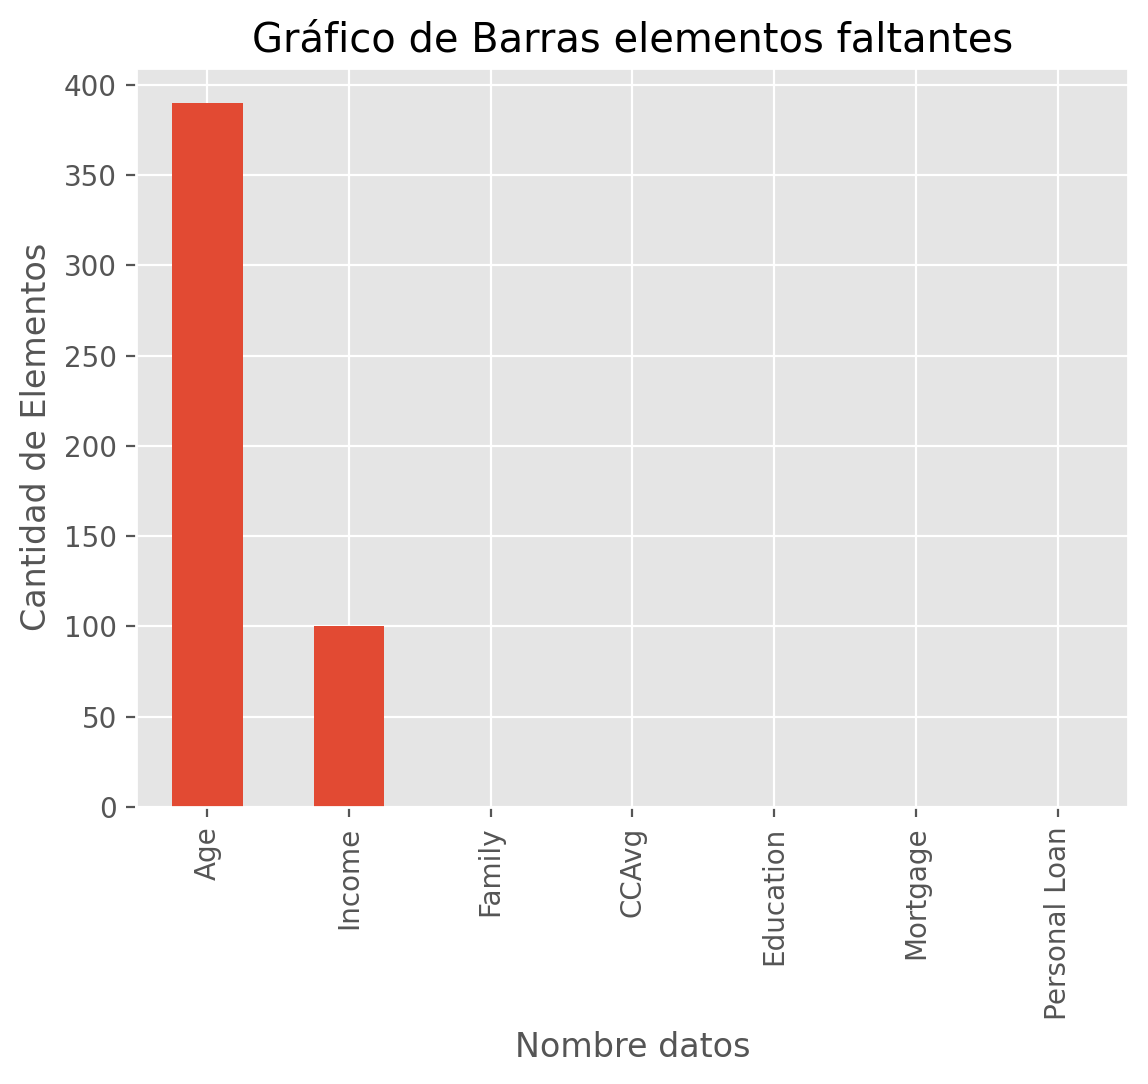

In [6]:
#procdemos a desarrollar el grafico de barras

# Crear el gráfico de barras
datos_faltantes.plot(kind='bar')
# Agregar etiquetas a los ejes
plt.xlabel('Nombre datos')
plt.ylabel('Cantidad de Elementos')
plt.title('Gráfico de Barras elementos faltantes')

# Mostrar el gráfico
plt.show()

2. Muestre cuantos datos hay por cada etiqueta de la variable respuesta ¿Qué aspectos destacan?

In [7]:


# Supongamos que df es tu DataFrame y target es tu variable objetivo
conteo_etiquetas=df_potencial['Personal Loan'].value_counts()

# Esto te dará una Serie de pandas con las etiquetas y la cantidad de ocurrencias
display(conteo_etiquetas)


0    4520
1     480
Name: Personal Loan, dtype: int64

Se puede ver que las la cantidad de variables esta desequilibrada, ya que hay una gran cantidad de personas que no tienen un prestamos personal, vs las que si tienen que corresponden a tan solo 480.


2. Separe aleatoriamente sus datos en 70% de entrenamiento y el resto para testeo.

In [8]:
from sklearn.model_selection import train_test_split

# Supongamos que tienes un DataFrame llamado 'df' con tus datos y una columna 'target' que es tu variable objetivo.
x = df_potencial.drop('Personal Loan', axis=1)  # Características
y = df_potencial['Personal Loan']  # Variable objetivo

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

# Ahora X_train y y_train son tus conjuntos de entrenamiento, y X_test y y_test son tus conjuntos de prueba.



3. Indique el tipo de variable de sus predictores. Cree la lista cat_vars con el nombre de sus variables categóricas.

In [9]:
x_train.info()
                                
cat_vars = x_train.columns[x_train.dtypes == "object"]
num_var = x_train.columns[x_train.dtypes != "object"]

print(cat_vars)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1359 to 4951
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        3230 non-null   float64
 1   Income     3426 non-null   float64
 2   Family     3500 non-null   int64  
 3   CCAvg      3500 non-null   float64
 4   Education  3500 non-null   object 
 5   Mortgage   3500 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 191.4+ KB
Index(['Education'], dtype='object')


4. Instancie las clases OneHotEncoder e IterativeImputer sin entregarle argumentos.

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Primero instanciamos las clases
one_hot = OneHotEncoder()
scaler  = StandardScaler()
imputer = IterativeImputer()

5. Cree un transformer que realize variables dummy con las variables categóricas e impute los datos faltantes de las variables numéricas. Específicamente esto último puede llevarlo a cabo entregando la instancia para imputar datos del ejercicio anterior al parámetro remainder.

In [11]:
transformer = make_column_transformer(
    (one_hot,cat_vars),
    (imputer, num_var),
    remainder='passthrough',
    verbose_feature_names_out=False
)

transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['Education'], dtype='object')),
                                ('iterativeimputer', IterativeImputer(),
                                 Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object'))],
                  verbose_feature_names_out=False)

In [12]:
transformer.get_feature_names_out()

array(['Education_Graduate', 'Education_Postgraduate',
       'Education_Undergraduate', 'Age', 'Income', 'Family', 'CCAvg',
       'Mortgage'], dtype=object)

In [13]:
#procdemos a prepara los dato para poder entregarselos al modelos
x_train_prep = pd.DataFrame(
    data=transformer.transform(x_train),
    columns=transformer.get_feature_names_out()
)

x_test_prep = pd.DataFrame(
    data=transformer.transform(x_test),
    columns= transformer.get_feature_names_out()
)

x_train_prep.head()
x_test_prep.head()


,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Age,Income,Family,CCAvg,Mortgage
0,1.00000,0.00000,0.00000,51.00000,68.00000,1.00000,1.50000,0.00000
1,1.00000,0.00000,0.00000,29.00000,113.00000,2.00000,2.00000,84.00000
2,0.00000,0.00000,1.00000,27.00000,88.00000,3.00000,0.80000,238.00000
3,0.00000,1.00000,0.00000,57.00000,42.00000,2.00000,2.10000,0.00000
4,0.00000,1.00000,0.00000,64.00000,18.00000,2.00000,0.30000,0.00000


In [15]:
#revisamos que no el transfomer halla rellenado los datos efaltantes
x_train_prep.isnull().sum()

Education_Graduate         0
Education_Postgraduate     0
Education_Undergraduate    0
Age                        0
Income                     0
Family                     0
CCAvg                      0
Mortgage                   0
dtype: int64

In [16]:
x_test_prep.isnull().sum()

Education_Graduate         0
Education_Postgraduate     0
Education_Undergraduate    0
Age                        0
Income                     0
Family                     0
CCAvg                      0
Mortgage                   0
dtype: int64

6. Instancie las clases DecisionTreeClassifier y RandomForestClassifier desde los módulos tree y ensemble de sklearn respectivamente. En ambos modelos indique los siguientes parámetros:

max_depth=10: Para que los árboles tengan profundidad máxima de 10.

criterion="entropy": Para usar entropía como criterio.

class_weight="balanced": Para ponderar cada observación. Es una forma de lidiar con el desbalanceo de datos, ya que asigna mayor peso a las categorías de la variable respuesta con menor volumen de datos.

random_state=2022: Para reproducibilidad.

Finalmente eree pipelines que consideren el transformer creado en el ejercicio anterior y cada uno de estos modelos.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #RandomForestregression
from sklearn.pipeline import make_pipeline

arbol_dsicion = DecisionTreeClassifier(
    max_depth=10,
    criterion="entropy",
    class_weight="balanced",
    random_state=2022,

)

random_forest = RandomForestClassifier(
    max_depth=10,
    criterion="entropy",
    class_weight="balanced",
    random_state=2022,

)

pipeline_arbol_decision= make_pipeline(transformer, arbol_dsicion)
pipeline_random_forest= make_pipeline(transformer, random_forest)

7. Entrene ambos modelos con datos de entrenamiento y después comente comparativamente el F1 en el set de testeo, para el árbol de decisión puede usar un código similar al siguiente para graficarlo:

[Text(0.5, 0.875, 'Income <= 92.561\nentropy = 1.0\nsamples = 3500\nvalue = [1750.0, 1750.0]\nclass = Adquiere producto'),
 Text(0.25, 0.625, 'CCAvg <= 2.95\nentropy = 0.341\nsamples = 2565\nvalue = [1406.073, 95.455]\nclass = Adquiere producto'),
 Text(0.125, 0.375, 'Age <= 26.5\nentropy = 0.037\nsamples = 2445\nvalue = [1349.211, 5.303]\nclass = Adquiere producto'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CCAvg <= 4.35\nentropy = 0.963\nsamples = 120\nvalue = [56.861, 90.152]\nclass = No adquiere producto'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Education_Undergraduate <= 0.5\nentropy = 0.662\nsamples = 935\nvalue = [343.927, 1654.545]\nclass = No adquiere producto'),
 Text(0.625, 0.375, 'Income <= 116.5\nentropy = 0.269\nsamples = 370\nvalue = [64.59, 1341.667]\nclass = No adquiere producto'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \

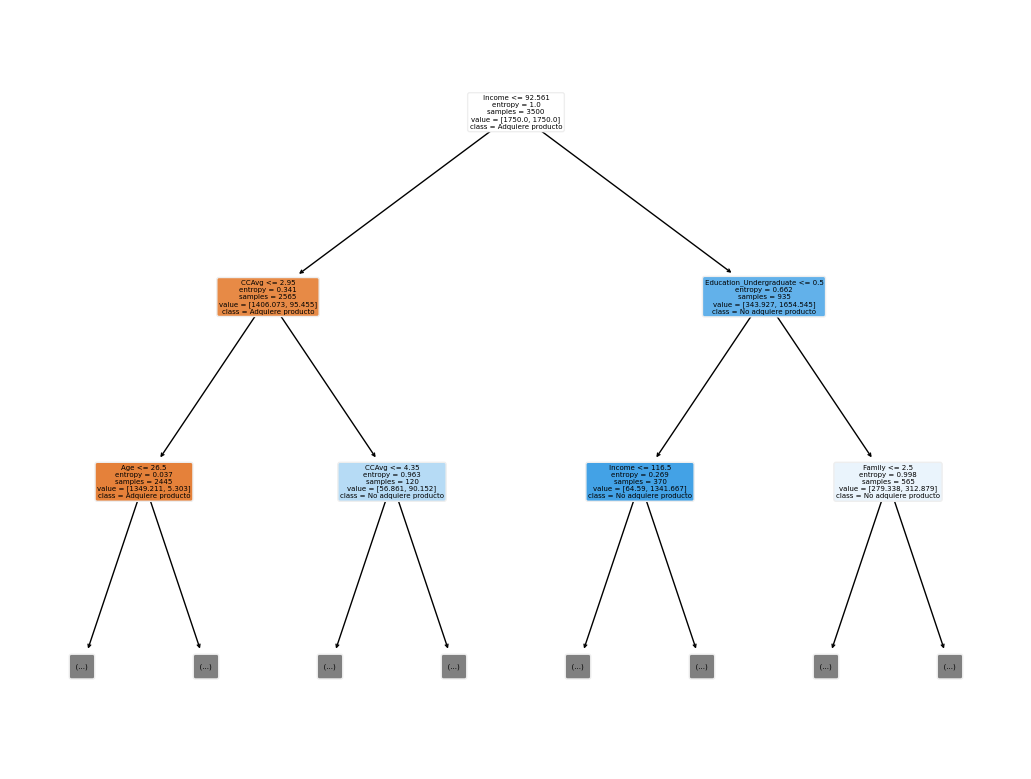

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Primero instanciamos las clases
one_hot = OneHotEncoder()
scaler = StandardScaler()
imputer = IterativeImputer()

transformer = make_column_transformer(
    (one_hot, cat_vars),
    (imputer, num_var),
    remainder='passthrough',
    verbose_feature_names_out=False
)

arbol_decision = DecisionTreeClassifier(
    max_depth=10,
    criterion="entropy",
    class_weight="balanced",
    random_state=2022,
)

random_forest = RandomForestClassifier(
    max_depth=10,
    criterion="entropy",
    class_weight="balanced",
    random_state=2022,
)

pipeline_arbol_decision = make_pipeline(transformer, arbol_decision)
pipeline_random_forest = make_pipeline(transformer, random_forest)

pipeline_arbol_decision.fit(x_train, y_train)
pipeline_random_forest.fit(x_train,y_train)

# Obtener los nombres de las características para el árbol de decisión
feature_names = list(transformer.named_transformers_['onehotencoder'].get_feature_names_out(cat_vars))
feature_names.extend(num_var)

plot_tree(
    decision_tree=pipeline_arbol_decision[-1],
    filled=True,
    rounded=True,
    max_depth=2,
    feature_names=feature_names,
    class_names=["Adquiere producto", "No adquiere producto"]
)


In [30]:
from sklearn.metrics import f1_score

# Calcular las predicciones en el conjunto de prueba para ambos modelos
y_pred_arbol_decision = pipeline_arbol_decision.predict(x_test)
y_pred_random_forest = pipeline_random_forest.predict(x_test)

# Calcular el F1-Score para ambos modelos
f1_arbol_decision = f1_score(y_test, y_pred_arbol_decision)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

print("F1-Score del árbol de decisión:", f1_arbol_decision)
print("F1-Score del bosque aleatorio:", f1_random_forest)


F1-Score del árbol de decisión: 0.880794701986755
F1-Score del bosque aleatorio: 0.9166666666666666


Ahora buscará los mejores hiperparámetros para el modelo Random Forest que acabó de entrenar. Para ello, se sugiere seguir los siguientes pasos:

8.a) Use un código similar a pipeline.named_steps.keys() para ver el nombre de cada paso de su pipeline para Random Forest.

8.b) Con lo anterior, podrá ver que dentro del pipeline su módelo de arból de decisión tiene el nombre "randomforestclassifier". Usted puede extraer el modelo, transformer o preprocesamiento usado usando ese nombre, al igual que un diccionario:

In [31]:
# Obtener los nombres de los pasos en el pipeline del modelo Random Forest
steps_names = pipeline_random_forest.named_steps.keys()

# Imprimir los nombres de los pasos
print("Nombres de los pasos en el pipeline del modelo Random Forest:")
for name in steps_names:
    print(name)


Nombres de los pasos en el pipeline del modelo Random Forest:
columntransformer
randomforestclassifier


In [33]:
from sklearn.model_selection import GridSearchCV, KFold

# Define los hiperparámetros a buscar, incluyendo "randomforestclassifier__ccp_alpha"
hiperparametros = {
    "randomforestclassifier__ccp_alpha": np.logspace(-3, 0, 5)
}

configuraciones = KFold(n_splits=5, shuffle=True, random_state=2022)

# Crea un nuevo modelo de GridSearchCV con el pipeline y los hiperparámetros definidos

grid_search_rf = GridSearchCV(pipeline_random_forest, hiperparametros, cv=configuraciones, scoring="f1", verbose=1, n_jobs=-1)

# Ajusta el modelo GridSearchCV a tus datos
grid_search_rf.fit(x_train, y_train)

# Obtiene el mejor valor de ccp_alpha y el mejor F1
mejor_ccp_alpha = grid_search_rf.best_params_["randomforestclassifier__ccp_alpha"]
mejor_f1 = grid_search_rf.best_score_

print(f"Mejor ccp_alpha: {mejor_ccp_alpha}")
print(f"Mejor F1: {mejor_f1}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor ccp_alpha: 0.001
Mejor F1: 0.9076253094617656


9. Obtenga el reporte de clasificación y gráfique el mejor árbol resultante del proceso anterior. Comente sobre posibles ganancias que se obtienen optimizando el valor de ccp_alpha.

In [42]:
from sklearn.metrics import classification_report

# Obtén el mejor modelo resultante de la optimización
mejor_modelo_rf = grid_search_rf.best_estimator_

# Realiza predicciones en el conjunto de prueba
y_pred_rf = mejor_modelo_rf.predict(x_test)

# Genera un informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred_rf)

print("Informe de Clasificación para el Mejor Modelo Random Forest:")
print(informe_clasificacion)
"""
# Grafica el mejor árbol resultante
plt.figure(figsize=(10, 10))
plot_tree(
    decision_tree=mejor_modelo_rf.named_steps["randomforestclassifier"].estimators_[0],
    filled=True,
    rounded=True,
    max_depth=2,
    feature_names=feature_names,
    class_names=["Adquiere producto", "No Adquiere producto"]
)
plt.show()
"""

Informe de Clasificación para el Mejor Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1350
           1       0.95      0.88      0.91       150

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



'\n# Grafica el mejor árbol resultante\nplt.figure(figsize=(10, 10))\nplot_tree(\n    decision_tree=mejor_modelo_rf.named_steps["randomforestclassifier"].estimators_[0],\n    filled=True,\n    rounded=True,\n    max_depth=2,\n    feature_names=feature_names,\n    class_names=["Adquiere producto", "No Adquiere producto"]\n)\nplt.show()\n'

In [40]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

# Ajusta el mejor modelo al conjunto de entrenamiento
mejor_ccp_alpha.fit(x_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_rf = mejor_ccp_alpha.predict(x_test)

# Genera un informe de clasificación
print("Informe de Clasificación para el Mejor Modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Grafica el mejor árbol resultante
plt.figure(figsize=(10, 10))
plot_tree(
    decision_tree=mejor_ccp_alpha[1].estimators_[0],  # Asegúrate de que esta parte es correcta
    filled=True,
    rounded=True,
    feature_names=x_train.columns,  # Asegúrate de que x_train sea tu conjunto de entrenamiento
    class_names=["Adquiere producto", "No adquiere producto"],
)
plt.show()


AttributeError: 'numpy.float64' object has no attribute 'fit'